## 目录:
* Tensorflow 机器
* Tensorflow 线性回归


# Tensorflow机器

基本上所有 TensorFlow 机器学习模型所遵循的构建流程，即**构建计算图、馈送输入张量、更新权重并返回输出值**。
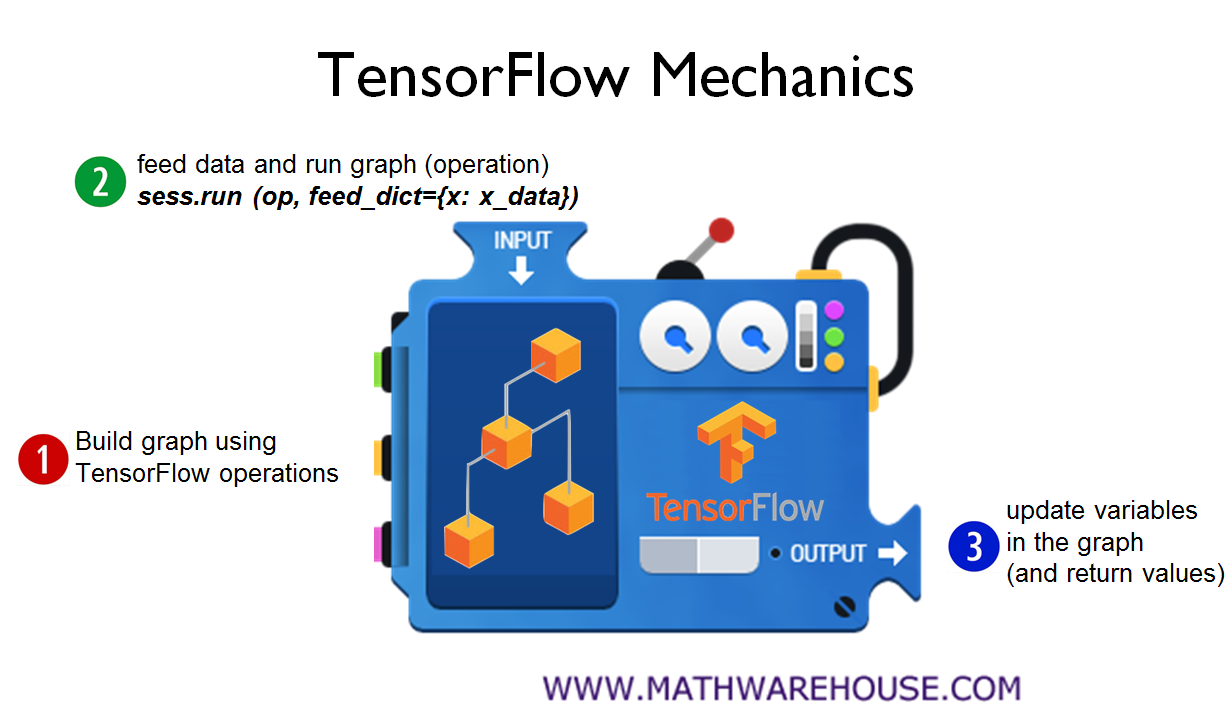
在第一步使用 TensorFlow 构建计算图中，我们需要构建整个模型的架构。例如在神经网络模型中，我们需要从输入层开始构建整个神经网络的架构，包括隐藏层的数量、每一层神经元的数量、层级之间连接的情况与权重、整个网络每个神经元使用的激活函数等内容。此外，我们还需要配置整个训练、验证与测试的过程。例如在神经网络中，定义整个正向传播的过程与参数并设定学习率、正则化率和批量大小等各类训练超参数。

第二步需要将训练数据或测试数据等馈送到模型中，TensorFlow 在这一步中一般需要打开一个会话（Session）来执行参数初始化和馈送数据等任务。例如在计算机视觉中，我们需要随机初始化整个模型参数数值，并将图像成批（图像数等于批量大小）地馈送到定义好的卷积神经网络中。

第三步即更新权重并获取返回值，这个一般是控制训练过程与获得最终的预测结果。

# 一元线性回归

下图「×」为数据点，我们需要找到一条直线以最好地拟合这些数据点。该直线和这些数据点之间的距离即损失函数，我们希望找到一条能令损失函数最小的直线。
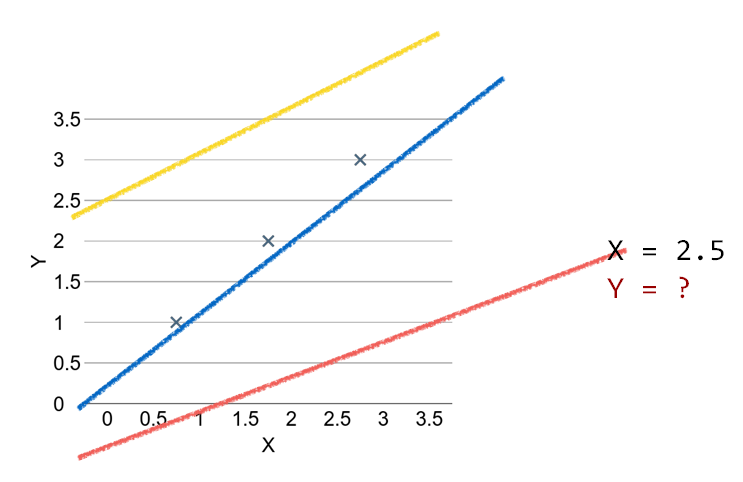
### 1. 构建目标函数（即「直线」）

目标函数即 H(x)=Wx+b，其中 x 为特征向量、W 为特征向量中每个元素对应的权重、b 为偏置项。

In [1]:
#数据X和Y
import tensorflow as tf
x_train = [1,2,3]
y_train = [1,2,3]

#初始化参数W、b，random_normal(shape,mean=0.0,stddev=1.0)
W = tf.Variable(tf.random_normal([1,0,1]),name = 'weight')
b = tf.Variable(tf.random_normal([1,0,1]),name = 'bias')
hypothesis = x_train * W + b

print(x_train,'\n',y_train,'\n',W,'\n',b,'\n',hypothesis) 

C:\Users\lidan\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


[1, 2, 3] 
 [1, 2, 3] 
 <tf.Variable 'weight:0' shape=(1, 0, 1) dtype=float32_ref> 
 <tf.Variable 'bias:0' shape=(1, 0, 1) dtype=float32_ref> 
 Tensor("add:0", shape=(1, 0, 3), dtype=float32)



### 2. 构建损失函数
下面我们需要构建整个模型的损失函数，即各数据点到该直线的距离，这里我们构建的损失函数为**均方误差函数**：
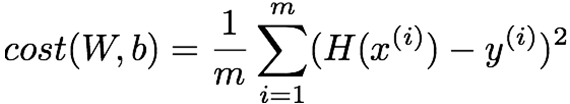
该函数表明根据数据点预测的值和该数据点真实值之间的距离，我们可以使用以下代码实现：

In [2]:
#损失函数
cost = tf.reduce_mean(tf.square(hypothesis - y_train))
#tf.square() 为取某个数的平方，tf.reduce_mean() 为取均值

均方误差函数可视化

### 3.  采用梯度下降更新权重

为了寻找能拟合数据的最好直线，我们需要最小化损失函数，即数据与直线之间的距离。由于均方误差函数是凹函数，因此我们可以采用梯度下降算法：
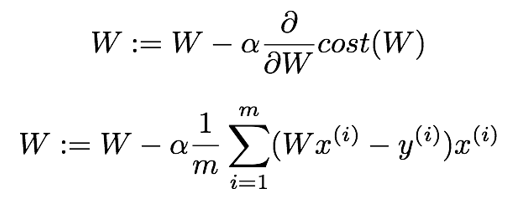

In [3]:
# 最小化损失
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

### 4. 运行计算图执行训练
在前三个步骤中我们完成了计算图的构建，现在打开一个session来于运行整个计算图。

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())  #初始化图中的全局变量

#拟合直线
for step in range(2001):
    sess.run(train)
    if step % 500 == 0:
        print(step,sess.run(cost),sess.run(W),sess.run(b))
print('模型训练完成:','W =',sess.run(W),'b =',sess.run(b))

0 nan [] []
500 nan [] []
1000 nan [] []
1500 nan [] []
2000 nan [] []
模型训练完成: W = [] b = []


### 线性回归代码汇总(使用占位符）

In [5]:
import tensorflow as tf
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
   cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                feed_dict={X: [1, 2, 3], Y: [1, 2, 3]})
   if step % 500 == 0:
       print(step, cost_val, W_val, b_val)

# Testing your model
print(sess.run(hypothesis,feed_dict = {X:[5]}))
print(sess.run(hypothesis,feed_dict = {X:[1,2]}))

0 8.13105 [ 0.0160955] [-0.43672541]
500 1.39416e-07 [ 1.00043273] [-0.00098352]
1000 1.27207e-08 [ 1.00013041] [-0.00029693]
1500 1.17225e-09 [ 1.00003946] [ -9.03731489e-05]
2000 1.15029e-10 [ 1.00001276] [ -2.82400470e-05]
[ 5.00003576]
[ 0.9999845   1.99999726]


# 多元线性回归

In [6]:
import tensorflow as tf
tf.set_random_seed(35)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val,'w1=',w1, "Prediction:", hy_val)
        #print(sess.run(w1),sess.run(w2),sess.run(w3),sess.run(b))


Tensor("add_4:0", dtype=float32)
0 Cost:  101120.0 w1= <tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref> Prediction: [-135.61862183 -150.831604   -154.66485596 -170.71734619 -110.21144104]
500 Cost:  14.105 w1= <tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref> Prediction: [ 147.25038147  187.76023865  179.67945862  193.31794739  147.74900818]
1000 Cost:  11.0151 w1= <tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref> Prediction: [ 147.89370728  187.31678772  179.87347412  193.48223877  147.14694214]
1500 Cost:  8.65346 w1= <tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref> Prediction: [ 148.45423889  186.93014526  180.04217529  193.62791443  146.61961365]
2000 Cost:  6.84735 w1= <tf.Variable 'weight1:0' shape=(1,) dtype=float32_ref> Prediction: [ 148.94252014  186.59303284  180.18873596  193.75726318  146.15756226]


In [7]:
# Testing your model 对将来y未知数据作预测
print(sess.run(hypothesis,feed_dict = {x1: [1], x2: [2], x3: [2]}))
print(sess.run(hypothesis,feed_dict = {x1: [2,0], x2: [2,0], x3: [2,0]}))

[ 1.71965098]
[ 3.67550969 -0.37444812]
